In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Import data into pandas from CSV
ride_data_df = pd.read_csv("C:/Users/RogStrix/Desktop/Repos/Pyber/ride_data.csv") 
ride_data_df.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [3]:
city_data_df = pd.read_csv("C:/Users/RogStrix/Desktop/Repos/Pyber/city_data.csv") 
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
city_data_df.drop_duplicates(subset = "city", inplace = True)


In [5]:
#Fare Statistics 
avgerage_fare_city = ride_data_df[['city', 'fare']].groupby("city").mean()
total_fare_city = ride_data_df[['city', 'fare']].groupby("city").sum()
rides_count_city = ride_data_df[['city', 'ride_id']].groupby('city').count()

In [6]:
#Merge City and Ride Fare 

analysis_df = pd.merge(city_data_df, avgerage_fare_city, left_on = "city", right_index = True)
analysis_df = pd.merge(analysis_df, total_fare_city, left_on = "city", right_index = True)
analysis_df = pd.merge(analysis_df, rides_count_city, left_on = "city", right_index = True)
analysis_df.rename(columns = {"driver_count": "Total Number of Drivers", "type": "City Type", "fare_x": "Average Fare", "fare_y": "Sum of Fares","ride_id": "Total Number of Rides"}, inplace = True)
analysis_df.head()

,city,Total Number of Drivers,City Type,Average Fare,Sum of Fares,Total Number of Rides
0,Kelseyland,63,Urban,21.806429,610.58,28
1,Nguyenbury,8,Urban,25.899615,673.39,26
2,East Douglas,12,Urban,26.169091,575.72,22
3,West Dawnfurt,34,Urban,22.330345,647.58,29
4,Rodriguezburgh,52,Urban,21.332609,490.65,23


In [7]:
#Dataframes for graphs

urban_analysis_df = analysis_df[analysis_df['City Type'] == "Urban"]
rural_analysis_df = analysis_df[analysis_df['City Type'] == "Rural"]
suburban_analysis_df = analysis_df[analysis_df['City Type'] == "Suburban"]


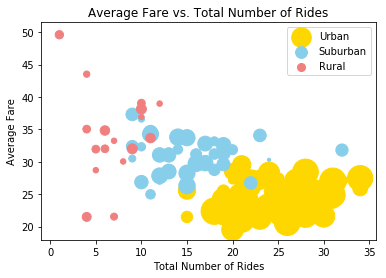

In [8]:
#Bubbleplot
colors = ['gold', 'skyblue', 'lightcoral']
plt.scatter(x = urban_analysis_df['Total Number of Rides'], y = urban_analysis_df['Average Fare'], 
           s = urban_analysis_df['Total Number of Drivers'] * 10, c = colors[0], label = "Urban")
plt.scatter(x = suburban_analysis_df['Total Number of Rides'], y = suburban_analysis_df['Average Fare'],
           s = suburban_analysis_df['Total Number of Drivers'] * 10, c = colors[1], label = "Suburban")
plt.scatter(x = rural_analysis_df['Total Number of Rides'], y = rural_analysis_df['Average Fare'],
           s = rural_analysis_df['Total Number of Drivers'] * 10, c = colors[2], label = "Rural")
plt.legend()
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")
plt.title("Average Fare vs. Total Number of Rides")

plt.show()

In [9]:
FaresTotal = city_data_df.merge(ride_data_df, on='city')

FaresTotal = FaresTotal[["type", "fare"]].groupby("type").sum().round(2).reset_index()
FaresTotal

,type,fare
0,Rural,4255.09
1,Suburban,19317.88
2,Urban,40078.34


In [10]:
RidesTotal = ride_data_df.merge(city_data_df, on='city')

RidesTotal = RidesTotal[["type", "ride_id"]].groupby("type").count().reset_index()
RidesTotal

,type,ride_id
0,Rural,125
1,Suburban,625
2,Urban,1625


In [11]:
DriversTotal = city_data_df.merge(ride_data_df, on='city')

DriversTotal = DriversTotal[["type", "driver_count"]].groupby("type").sum().round(2).reset_index()
DriversTotal

,type,driver_count
0,Rural,727
1,Suburban,9634
2,Urban,64501


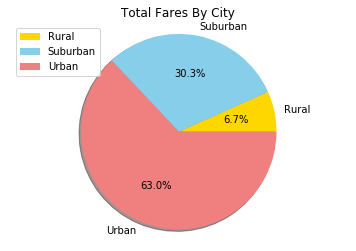

In [12]:
#(%) of Total Fares by City
TotalFarePie = FaresTotal['fare']
labels='Rural', 'Suburban', 'Urban'
plt.pie(TotalFarePie, colors = colors, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Total Fares By City')
plt.legend()
plt.show()

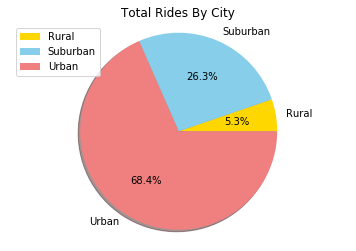

In [13]:
#(%) of Total Rides by City
totalRideChart = RidesTotal['ride_id']
labels='Rural', 'Suburban', 'Urban'
plt.pie(totalRideChart, colors = colors, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Total Rides By City')
plt.legend()
plt.show()

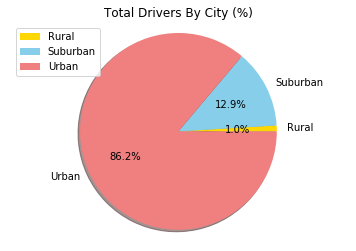

In [14]:
#(%) of Total Drivers By City 
TotalDriversPie = DriversTotal['driver_count']
labels='Rural', 'Suburban', 'Urban'
plt.pie(TotalDriversPie, colors = colors, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Total Drivers By City (%)')
plt.legend()
plt.show()